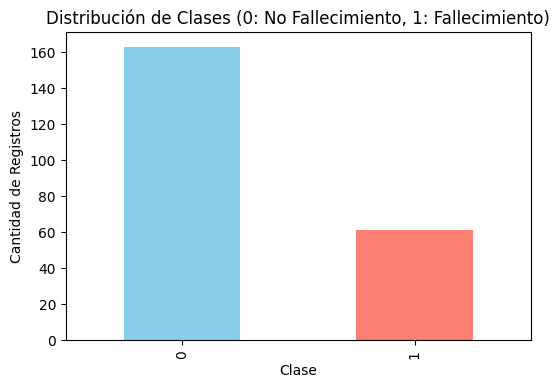

Accuracy on test set: 1.00


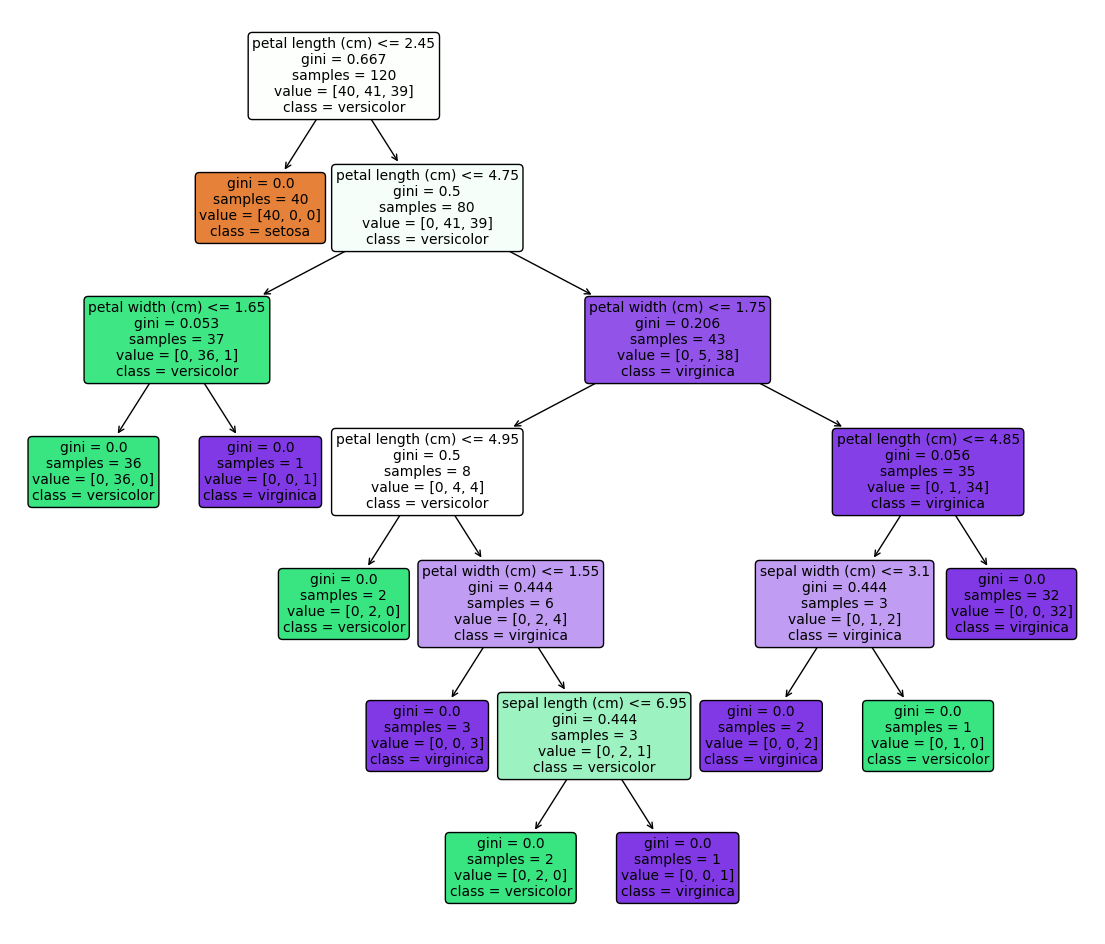

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('dataset_procesado.csv')

# Eliminar la columna 'categoria_edad'
data = data.drop(['age_group'], axis=1)

# Graficar la distribución de clases
plt.figure(figsize=(6, 4))
data['DEATH_EVENT'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clases (0: No Fallecimiento, 1: Fallecimiento)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.show()

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

# Cargar conjunto de datos de Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Entrenar un clasificador de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')

# Convierta la matriz en una lista para 'class_names'
class_names_list = iris.target_names.tolist()

# Trazar el árbol de decisión
plt.figure(figsize=(14, 12))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=class_names_list, rounded=True, fontsize=10)
plt.show()
